# Data Access for the Oceanbench v2 datachallenge demo


## Reusing processing steps and reproducing data preparation

### Use the configured `ocb-dc_ose_2021-input_data` pipeline
![](imgs/data_doc.png)

#### Reproduce processing of single satellite

In [1]:
!ocb-dc_ose_2021-input_data params.sat=j2g

[2024-04-10 08:48:49,688][aprl.appareil][INFO] - Starting
[2024-04-10 08:48:49,688][aprl.appareil][INFO] - Running part _01_dl_track


Fetching catalog:   0%|                                   | 0/3 [00:00<?, ?it/s]

Fetching catalog: 100%|███████████████████████████| 3/3 [00:14<00:00,  4.96s/it]
INFO - 2024-04-10T08:49:04Z - Dataset version was not specified, the latest one was selected: "202112"
[2024-04-10 08:49:04,844][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"
INFO - 2024-04-10T08:49:04Z - Dataset part was not specified, the first one was selected: "default"
[2024-04-10 08:49:04,844][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-04-10T08:49:04Z - Service was not specified, the default one was selected: "original-files"
[2024-04-10 08:49:04,844][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"
INFO - 2024-04-10T08:49:04Z - Downloading using service original-files...
[2024-04-10 08:49:04,844][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


  0%|                                                    | 0/66 [00:00<?, ?it/s]

  2%|▋                                           | 1/66 [00:02<02:52,  2.65s/it]

  6%|██▋                                         | 4/66 [00:03<00:40,  1.54it/s]

 14%|██████                                      | 9/66 [00:04<00:24,  2.28it/s]

 15%|██████▌                                    | 10/66 [00:05<00:25,  2.23it/s]

 26%|███████████                                | 17/66 [00:07<00:15,  3.12it/s]

 30%|█████████████                              | 20/66 [00:07<00:12,  3.67it/s]

 38%|████████████████▎                          | 25/66 [00:09<00:11,  3.42it/s]

 39%|████████████████▉                          | 26/66 [00:09<00:12,  3.33it/s]

 45%|███████████████████▌                       | 30/66 [00:09<00:07,  4.98it/s]

 50%|█████████████████████▌                     | 33/66 [00:11<00:10,  3.25it/s]

 52%|██████████████████████▏                    | 34/66 [00:11<00:10,  3.02it/s]

 62%|██████████████████████████▋                | 41/66 [00:13<00:07,  3.26it/s]

 74%|███████████████████████████████▉           | 49/66 [00:15<00:04,  3.54it/s]

 83%|███████████████████████████████████▊       | 55/66 [00:16<00:02,  4.62it/s]

100%|███████████████████████████████████████████| 66/66 [00:21<00:00,  3.08it/s]
[2024-04-10 08:49:26,743][aprl.appareil][INFO] - part _01_dl_track done
[2024-04-10 08:49:26,743][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:26,744][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-10 08:49:33,269][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 08:49:33,300][aprl.appareil][INFO] - part _02_prepare_track done
[2024-04-10 08:49:33,300][aprl.appareil][INFO] - Done


In [2]:
import xarray as xr
ds = xr.open_mfdataset('data/prepared/input/*.nc', combine='nested',concat_dim='time')
ds

<xarray.Dataset> Size: 450kB
Dimensions:  (time: 14060)
Coordinates:
  * time     (time) datetime64[ns] 112kB 2017-07-11T14:55:44.772069888 ... 20...
    lon      (time) float64 112kB dask.array<chunksize=(14060,), meta=np.ndarray>
    lat      (time) float64 112kB dask.array<chunksize=(14060,), meta=np.ndarray>
Data variables:
    ssh      (time) float64 112kB dask.array<chunksize=(14060,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P12H19M2.66746S
    time_coverage_end:               2017-07-11T23:30:27Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2017-07-11T11:11:25Z
    title:                           DT OSTM/Jason-2 Long Repeat Orbit Global...

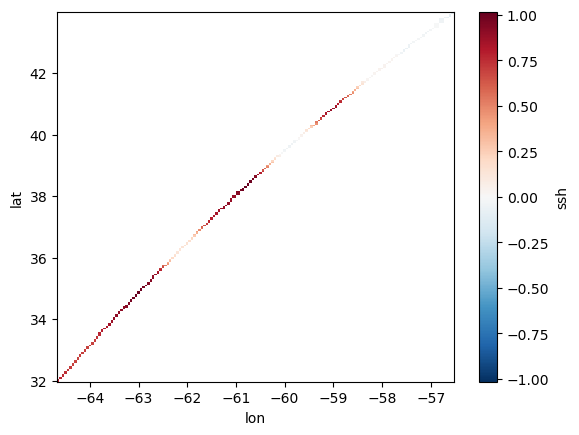

In [3]:
# 2D map
bin_size = 1/20
(
    ds.sel(time='2017-08-01').assign(
        lat=ds.lat / bin_size // 1 * bin_size,
        lon=ds.lon / bin_size // 1 * bin_size
    )[['ssh', 'lat', 'lon']].load()
    .drop_vars('time')
    .to_dataframe()
    .groupby(['lat', 'lon']).mean()
    .to_xarray()
).ssh.plot()

#### Dry (without actual execution) run for all satellites

In [4]:
!ocb-dc_ose_2021-input_data --multirun dry=True

[2024-04-10 08:49:38,403][HYDRA] Launching 6 jobs locally
[2024-04-10 08:49:38,403][HYDRA] 	#0 : params.sat=alg dry=True


[2024-04-10 08:49:38,516][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:38,516][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:38,516][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:38,516][aprl.appareil][INFO] - Done
[2024-04-10 08:49:38,517][HYDRA] 	#1 : params.sat=h2ag dry=True


[2024-04-10 08:49:38,624][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:38,624][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:38,624][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:38,624][aprl.appareil][INFO] - Done
[2024-04-10 08:49:38,624][HYDRA] 	#2 : params.sat=j2g dry=True


[2024-04-10 08:49:38,725][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:38,725][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:38,725][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:38,725][aprl.appareil][INFO] - Done
[2024-04-10 08:49:38,726][HYDRA] 	#3 : params.sat=j2n dry=True


[2024-04-10 08:49:38,824][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:38,825][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:38,825][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:38,825][aprl.appareil][INFO] - Done
[2024-04-10 08:49:38,825][HYDRA] 	#4 : params.sat=j3 dry=True


[2024-04-10 08:49:38,925][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:38,925][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:38,925][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:38,925][aprl.appareil][INFO] - Done
[2024-04-10 08:49:38,926][HYDRA] 	#5 : params.sat=s3a dry=True


[2024-04-10 08:49:39,050][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:39,050][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:39,050][aprl.appareil][INFO] - Running part _02_prepare_track
[2024-04-10 08:49:39,050][aprl.appareil][INFO] - Done


## Downloading versioned and preprocessed data

### Listing datachallenge content

In [5]:
# Storing the repo url for convenience
%env DC_REPO=https://github.com/quentinf00/ocb-dc-ose-2021.git

env: DC_REPO=https://github.com/quentinf00/ocb-dc-ose-2021.git


In [6]:
# Listing and pretty printing all files of the datachallenge
!dvc ls -R $DC_REPO datachallenge/data | tree --fromfile

Cloning ocb-dc-ose-2021.git|                        |0.00/? [00:00,      ?obj/s]

Cloning ocb-dc-ose-2021.git|█████████| Compressing |223/223 [00:00,   1.70obj/s]

.
├── metrics
│   ├── lambdax_4dvarnet.json
│   ├── lambdax_duacs.json
│   ├── mu_4dvarnet.json
│   └── mu_duacs.json
└── prepared
    ├── input
    │   ├── alg.nc
    │   ├── h2ag.nc
    │   ├── j2g.nc
    │   ├── j2n.nc
    │   ├── j3.nc
    │   └── s3a.nc
    ├── method_outputs
    │   ├── 4dvarnet_on_track.nc
    │   ├── duacs_on_track.nc
    │   ├── psd_4dvarnet.nc
    │   └── psd_duacs.nc
    └── ref
        └── c2.nc

5 directories, 15 files


### Downloading prepared input data

In [7]:
!dvc get -q $DC_REPO datachallenge/data/prepared/input

In [8]:
!tree input

input
├── alg.nc
├── h2ag.nc
├── j2g.nc
├── j2n.nc
├── j3.nc
└── s3a.nc

0 directories, 6 files


### Visualize input data

In [9]:
ds = xr.open_mfdataset('input/*.nc', combine='nested',concat_dim='time')
ds

<xarray.Dataset> Size: 11MB
Dimensions:  (time: 353305)
Coordinates:
  * time     (time) datetime64[ns] 3MB 2016-12-01T22:45:18.975349760 ... 2018...
    lon      (time) float64 3MB dask.array<chunksize=(78000,), meta=np.ndarray>
    lat      (time) float64 3MB dask.array<chunksize=(78000,), meta=np.ndarray>
Data variables:
    ssh      (time) float64 3MB dask.array<chunksize=(78000,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P23H18M50.723265S
    time_coverage_end:               2016-12-01T23:19:21Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2016-12-01T00:00:30Z
    title:                           DT Altika Drifting Phase Global Ocean Al...

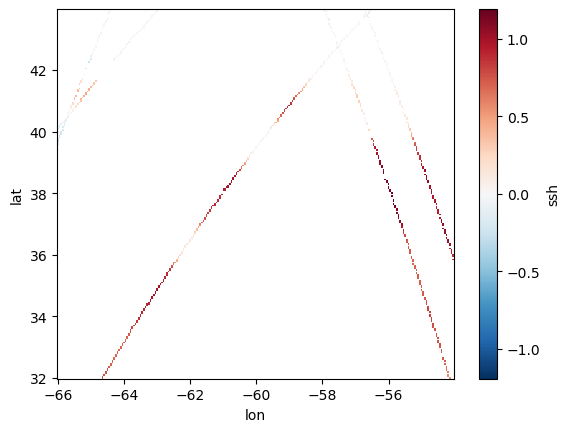

In [10]:
# 2D map
bin_size = 1/20
(
    ds.sel(time='2017-08-01').assign(
        lat=ds.lat / bin_size // 1 * bin_size,
        lon=ds.lon / bin_size // 1 * bin_size
    )[['ssh', 'lat', 'lon']].load()
    .drop_vars('time')
    .to_dataframe()
    .groupby(['lat', 'lon']).mean()
    .to_xarray()
).ssh.plot()

### Checking generated data VS downloaded

In [11]:
xr.testing.assert_allclose(
    xr.open_dataset('data/prepared/input/j2g.nc'),
    xr.open_dataset('input/j2g.nc'),
)
print("Successful reproduction")

Successful reproduction


### More on pipeline usage (help, doc, ...)

In [12]:
!ocb-dc_ose_2021-input_data --help

Overview:
    Download and prepare data for SSH Mapping (requires CMEMS credentials for download)
    The ssh is computed as "sla_filtered + mdt - lwe"

Basic CLI Usage:
  *  params.sat=<sat_id> to download a prepare a specific satellite

  *  --multirun: Execute the pipeline for each sat in sat_list

  *  params.(min|max)_(lon|lat|time)=<bound> to change the bound

  *  `-cd conf overrides=my_conf` to load config from conf/aprl/overrides/my_conf.yaml

Params:
    sat (str): altimeter id to download (place holder for multirun)
    sat_list (str): list of satellite to download
    min_time: start of the temporal domain
    max_time: end of the temporal domain
    min_lon: lower longitudinal bound
    max_lon: upper longitudinal bound
    min_lat: upper latitudinal bound
    max_lat: upper latitudinal bound

Parts:
	_01_dl_track -> copernicusmarine.python_interface.get.get
	_02_prepare_track -> ocb_dc_ose_2021.mods.prepare_track.prepare_track

Misc:
    Run  with "dry=True hydra.verbose=

In [13]:
!ocb-dc_ose_2021-input_data params.sat=alg dry=True 'hydra.verbose=[aprl.appareil]'

[2024-04-10 08:49:50,937][aprl.appareil][INFO] - Starting
[2024-04-10 08:49:50,937][aprl.appareil][INFO] - Running part _01_dl_track
[2024-04-10 08:49:50,937][aprl.appareil][DEBUG] - get
[2024-04-10 08:49:50,937][aprl.appareil][DEBUG] - 
    Fetches data from the Copernicus Marine server based on the provided parameters.

    Args:
        dataset_url (str, optional): The URL of the dataset to retrieve.
        dataset_id (str, optional): The unique identifier of the dataset.
        dataset_version (str, optional): Force the use of a specific dataset version.
        dataset_part (str, optional): Force the use of a specific dataset part.
        username (str, optional): The username for authentication.
        password (str, optional): The password for authentication.
        no_directories (bool, optional): If True, downloaded files will not be organized into directories.
        show_outputnames (bool, optional): If True, display the names of the downloaded files.
        output_di